In [2]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [3]:
image = np.asarray(Image.open('city.jpeg').convert('LA'))[:, :, 0]

In [4]:
u, d, v = np.linalg.svd(image)

Function to restore the image with K rank

In [5]:
restore = lambda x: np.matmul(u[:, :x] * d[:x], v[:x, :])

### Images with low rank approximation

Image is recognizable starting from rank 10 and gets better and better as we increase K (rank)

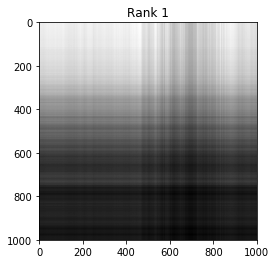

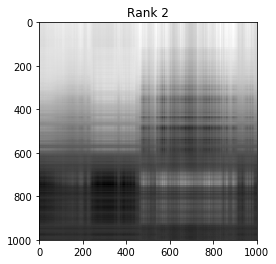

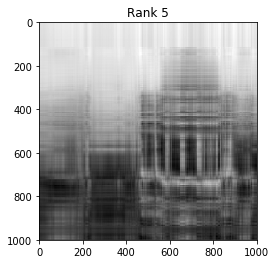

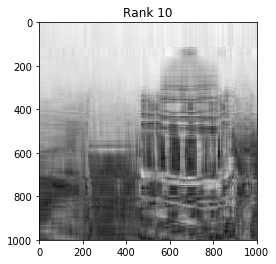

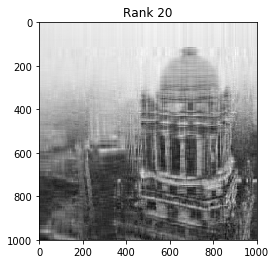

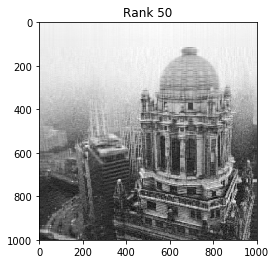

In [6]:
errors = []
image_norm = np.linalg.norm(image)
for i in [1, 2, 5, 10, 20, 50]:
    restored = restore(i)
    errors.append((i, image_norm - np.linalg.norm(restored)))
    plt.imshow(restored,  cmap = plt.get_cmap('gray'))
    plt.title("Rank {}".format(i))
    plt.show()

errors = np.array(errors)

### Error plot
As we can see, error decreasing very fast and for i=50 it's around 500

In [7]:
print("Total Image norm: {}".format(image_norm))

Total Image norm: 151006.1772345754


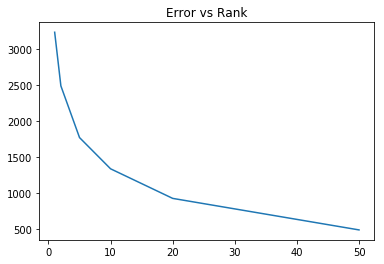

In [8]:
plt.title("Error vs Rank")
plt.plot(errors[:, 0], errors[:, 1])
plt.show()